### Avocado Project

#### Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
**Date** - The date of the observation
**AveragePrice** - the average price of a single avocado
**type** - conventional or organic
**year** - the year
**Region** - the city or region of the observation
**Total Volume** - Total number of avocados sold
**4046** - Total number of avocados with PLU 4046 sold
**4225** - Total number of avocados with PLU 4225 sold
**4770** - Total number of avocados with PLU 4770 sold


Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 


In [1]:
# importing necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the dataset from the system
data = pd.read_csv(r"C:\Users\LENOVO\Downloads\avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# lat 5 rows
data.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [4]:
# checking for column names and dimensions
print(data.columns)
print()
print("Shape of the Dataset :", data.shape)

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Shape of the Dataset : (18249, 14)


The dataset is quite big with 18249 rows and 14 columns. Since, 'Unnamed: 0' column is not necessary we will drop this column and convert the date column to datetime.

In [5]:
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
# lets check the reions in the dataset
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [8]:
# We will filter out subtotals like total us, west, midsouth, northeast, south central and southeast beacuse we will only consider city names here

# Define the list of regions to exclude
regions_to_exclude = ['TotalUS', 'West', 'Midsouth', 'Northeast', 'SouthCentral', 'Southeast']

# Filter out rows with specified regions
data = data[~data['region'].isin(regions_to_exclude)]

In [9]:
print("Shape of the filtered dataset: ", data.shape)

Shape of the filtered dataset:  (16221, 13)


We filtered out around 200 rows.

In [10]:
# checking the summary statistics
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16221 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          16221 non-null  datetime64[ns]
 1   AveragePrice  16221 non-null  float64       
 2   Total Volume  16221 non-null  float64       
 3   4046          16221 non-null  float64       
 4   4225          16221 non-null  float64       
 5   4770          16221 non-null  float64       
 6   Total Bags    16221 non-null  float64       
 7   Small Bags    16221 non-null  float64       
 8   Large Bags    16221 non-null  float64       
 9   XLarge Bags   16221 non-null  float64       
 10  type          16221 non-null  object        
 11  year          16221 non-null  int64         
 12  region        16221 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.7+ MB


There are 3 different datatypes present - float,int and object.
The date is in datetime format.

In [11]:
print("\n=== Missing Values ===")
print(data.isnull().sum())


=== Missing Values ===
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


There is no missing data here.

In [12]:
# lets check for unique values in each column
data.nunique()

Date              169
AveragePrice      259
Total Volume    16209
4046            15677
4225            16077
4770            10232
Total Bags      16070
Small Bags      15296
Large Bags      13067
XLarge Bags      4646
type                2
year                4
region             48
dtype: int64

In [13]:
# checking for duplicated rows
print("Total Duplicated Rows: ", data.duplicated().sum())

Total Duplicated Rows:  0


In [14]:
print("=== Summary Statistics ===")
print()
print(data.describe().T)

=== Summary Statistics ===

                count           mean            std      min      25%  \
AveragePrice  16221.0       1.413036       0.408240     0.44     1.10   
Total Volume  16221.0  352859.562367  806556.007096    84.56  9219.97   
4046          16221.0  115494.337945  319810.820579     0.00   641.47   
4225          16221.0  127139.946088  300957.434473     0.00  2449.35   
4770          16221.0   11643.145415   42056.318818     0.00     0.00   
Total Bags    16221.0   98580.807819  230840.173940     0.00  4034.96   
Small Bags    16221.0   77608.909362  200578.567780     0.00  2110.00   
Large Bags    16221.0   19334.714413   51455.538772     0.00    62.51   
XLarge Bags   16221.0    1637.183489    7322.256244     0.00     0.00   
year          16221.0    2016.147895       0.939941  2015.00  2015.00   

                   50%        75%          max  
AveragePrice      1.38       1.67         3.25  
Total Volume  80015.17  344490.91  11213596.29  
4046           5403.0

1. The average avocado price is around 1.41, with a minimum price of 0.44 and a maximum price of 3.25.
2. The total volume column depicts the volume of avocados sold, with a mean of about 352,860 units and a standard deviation of around 806,556 units.
3. 4046, 4225, 4770 represent different avocado varieties. The data for 4046 and 4770 variety is highly skewed, as evident from the large difference between the mean and median (50th percentile).
4. Total Bags, Small Bags, Large Bags, XLarge Bags columns represent the quantities of avocados in different bag sizes. Again, the data is skewed.
5. Year column contains the data that spans from 2015 to 2018. 

In [15]:
# checking the categorical columns
data['type'].value_counts()

conventional    8112
organic         8109
Name: type, dtype: int64

The type column contains 2 unique values and both are equally distributed.

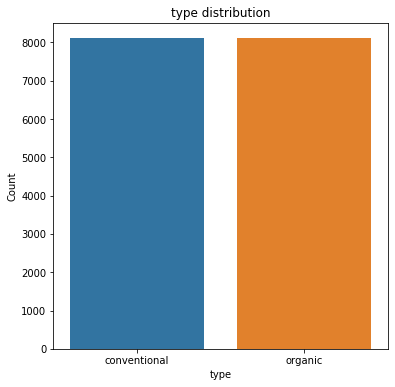

In [16]:
# Plotting barplots
plt.figure(figsize=(6,6))
sns.countplot(data=data, x=data['type'])
plt.ylabel("Count")
plt.title("type distribution")
plt.show()

In [17]:
data['region'].value_counts()

Tampa                  338
SanFrancisco           338
GrandRapids            338
Seattle                338
California             338
Spokane                338
Boise                  338
Charlotte              338
Houston                338
NorthernNewEngland     338
NewOrleansMobile       338
Columbus               338
Detroit                338
Jacksonville           338
Indianapolis           338
PhoenixTucson          338
Pittsburgh             338
LosAngeles             338
CincinnatiDayton       338
Orlando                338
Atlanta                338
Plains                 338
Roanoke                338
Boston                 338
HartfordSpringfield    338
RaleighGreensboro      338
HarrisburgScranton     338
Denver                 338
Chicago                338
Nashville              338
RichmondNorfolk        338
LasVegas               338
Philadelphia           338
NewYork                338
GreatLakes             338
MiamiFtLauderdale      338
Syracuse               338
A

The region column contains 54 different values and they are equally distributed.

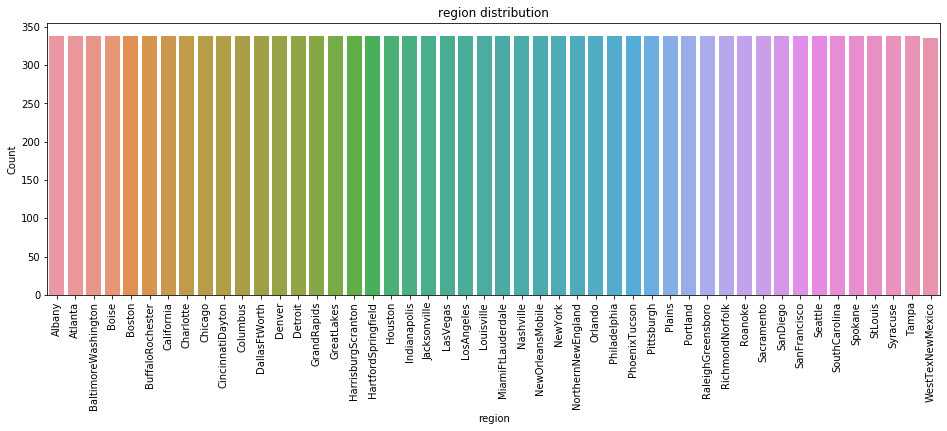

In [18]:
# Plotting barplot
plt.figure(figsize=(16,5))
sns.countplot(data=data, x=data['region'])
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("region distribution")
plt.show()

In [19]:
data['year'].value_counts()

2017    5086
2016    4992
2015    4991
2018    1152
Name: year, dtype: int64

2017 appear to have a higher value count than all other years.

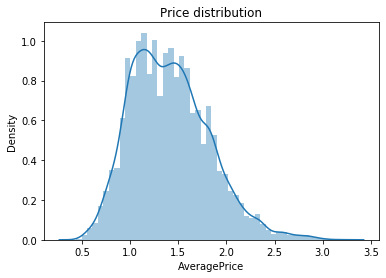

In [20]:
# plotting the Average Price
sns.distplot(data['AveragePrice'])
plt.title("Price distribution")
plt.show()

Here we can see that the probability of finding prices of avocado between 1.0 and 1.70 is higher. It's pretty hard to find prices in the range of 0.5 to 0.8 and 2.2 to 3.0. And the most common price is close to 1.1 dollars.

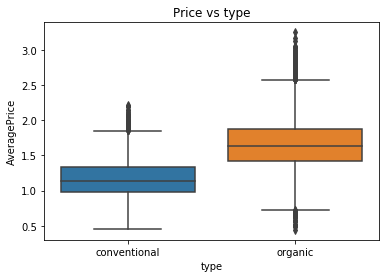

In [21]:
# lets check for price among different types of avocados

sns.boxplot(data=data, x='type', y='AveragePrice')
plt.title("Price vs type")
plt.show()

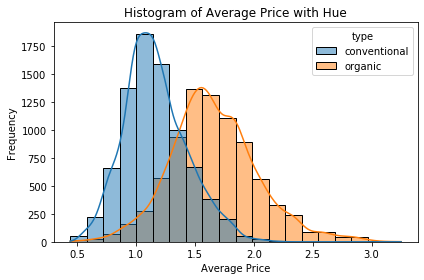

In [22]:
# lets  Create a histogram with type as the hue parameter
sns.histplot(data=data, x='AveragePrice', hue='type', bins=20, kde=True)
plt.title('Histogram of Average Price with Hue')
plt.xlabel('Average Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Organic avocados tends to be little expensive with average price of 1.6 while conventional avocados have average price of $1.1.

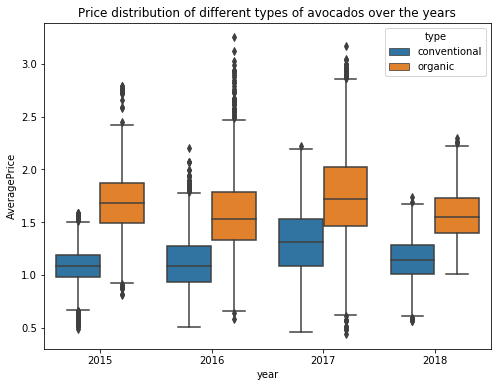

In [23]:
# lets plot price distribuion over the years
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='year', y='AveragePrice', hue='type')
plt.title("Price distribution of different types of avocados over the years")
plt.show()

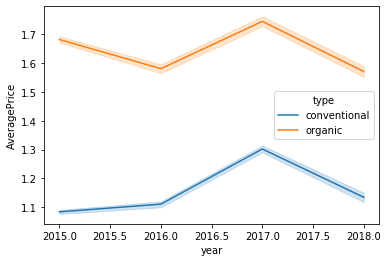

In [24]:
# creating a line plot
sns.lineplot(data=data, x="year", y="AveragePrice", hue="type")
plt.show()

Organic avocados have higher price compared to the conventional ones for all years. Year 2017 has the highest average prices for both avocado types.

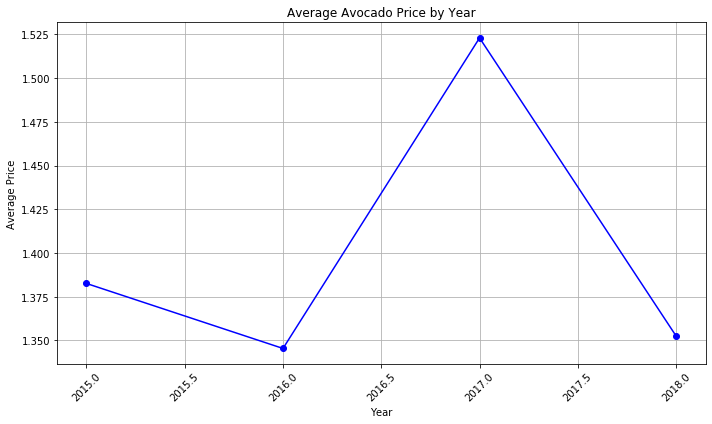

In [25]:
# Plotting the average price across years

plt.figure(figsize=(10, 6))
data.groupby('year')['AveragePrice'].mean().plot(marker='o', linestyle='-', color='b')

plt.title('Average Avocado Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

1. The above graph shows that average price was 1.38 in 2015.
2. It took a dip in 2016 becomes 1.34 which is the lowest average.
3. In 2017, it shot up and become the highest average with a vaue of 1.52.
4. In 2018, it again took a dip and becomes 1.35.

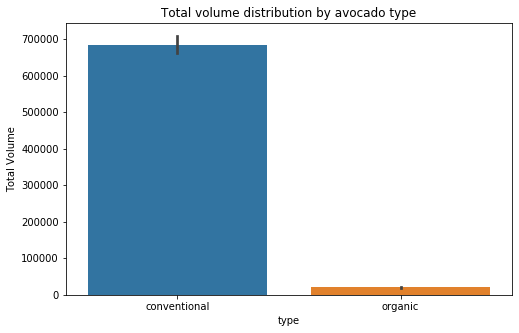

In [26]:
# plotting the total volume vs type
plt.figure(figsize=(8,5))
sns.barplot(data=data, x=data['type'], y=data['Total Volume'])
plt.title("Total volume distribution by avocado type")
plt.show()

This graph shows that conventional avocados were sold in lage volumes since they are cheaper than the organic ones.

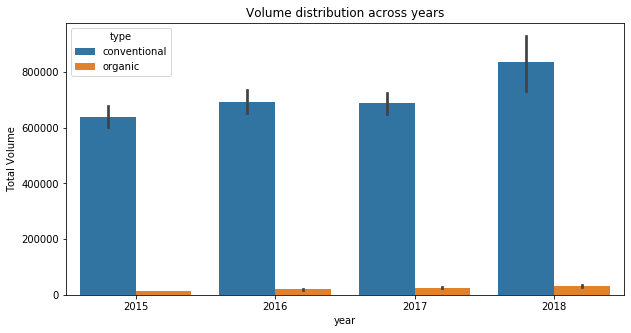

In [27]:
# lets plot volume distribuion over the years
plt.figure(figsize=(10,5))
sns.barplot(data=data, x='year', y='Total Volume', hue='type')
plt.title("Volume distribution across years")
plt.show()

In [28]:
# Group data by year and calculate the sum of each bag type
bag_columns = ['Small Bags', 'Large Bags', 'XLarge Bags']
total_bags_yearly = data.groupby('year')[bag_columns].sum()

# Display the total number of each bag type sold year-wise
print(total_bags_yearly)

        Small Bags    Large Bags  XLarge Bags
year                                         
2015  2.338745e+08  4.090454e+07   3021091.58
2016  4.281279e+08  1.095755e+08   8955036.88
2017  4.631282e+08  1.273336e+08  11190792.75
2018  1.337636e+08  3.581481e+07   3389832.17


<Figure size 576x432 with 0 Axes>

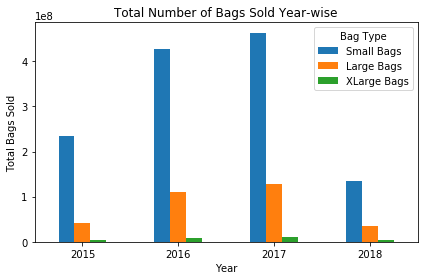

In [29]:
# Plotting the bags
plt.figure(figsize=(8, 6))
total_bags_yearly.plot(kind='bar')
plt.title('Total Number of Bags Sold Year-wise')
plt.xlabel('Year')
plt.ylabel('Total Bags Sold')
plt.xticks(rotation=0)
plt.legend(title='Bag Type')
plt.tight_layout()

plt.show()

Small bags were the highest sold and Xlarge bags were sold the least every year.

In [30]:
# Group data by year and calculate the sum of different variety
variety_columns = ['4046', '4225','4770']
total_variety_yearly = data.groupby('year')[variety_columns].sum()

# Display the total number of each bag type sold year-wise
print(total_variety_yearly)

              4046          4225         4770
year                                         
2015  6.212624e+08  6.661107e+08  64219235.95
2016  5.226435e+08  6.451047e+08  67335045.84
2017  5.713622e+08  5.938523e+08  45314721.55
2018  1.581655e+08  1.572694e+08  11994458.44


<Figure size 576x432 with 0 Axes>

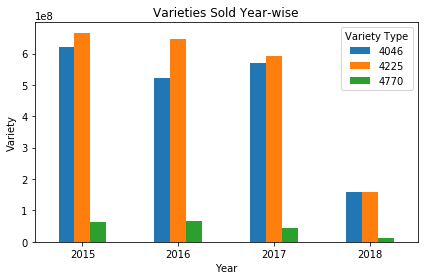

In [31]:
# Plotting the variety
plt.figure(figsize=(8, 6))
total_variety_yearly.plot(kind='bar')
plt.title('Varieties Sold Year-wise')
plt.xlabel('Year')
plt.ylabel('Variety')
plt.xticks(rotation=0)
plt.legend(title='Variety Type')
plt.tight_layout()
plt.show()

PLU 4470 has the lowest number of units sold every year. PLU 4225 has the highest number of units sold every year.

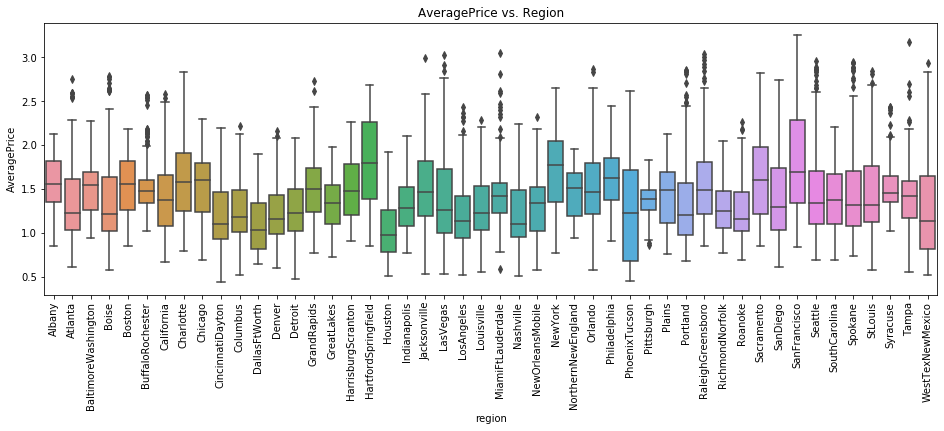

In [32]:
# AveragePrice vs. region
plt.figure(figsize=(16,5))
plt.xticks(rotation=90)
sns.boxplot(data=data, x='region', y='AveragePrice')
plt.title('AveragePrice vs. Region')

plt.show()

1. We can say that MiamiFtLauderdale has the highest number of visible outliers.
2. SanFrancisco, New York and HartfordSpringfield have the highest average price for avocado.
3. Houston has the lowest average price.

In [33]:
# average prices by region, sorted highest to lowest
data.groupby(['region']).mean()['AveragePrice'].sort_values(ascending = False)

region
HartfordSpringfield    1.818639
SanFrancisco           1.804201
NewYork                1.727574
Philadelphia           1.632130
Sacramento             1.621568
Charlotte              1.606036
Albany                 1.561036
Chicago                1.556775
RaleighGreensboro      1.555118
BaltimoreWashington    1.534231
Boston                 1.530888
Syracuse               1.520325
BuffaloRochester       1.516834
HarrisburgScranton     1.513284
Jacksonville           1.510947
Orlando                1.506213
GrandRapids            1.505000
NorthernNewEngland     1.477396
Spokane                1.445592
Seattle                1.442574
Plains                 1.436509
StLouis                1.430621
MiamiFtLauderdale      1.428491
Tampa                  1.408846
SouthCarolina          1.403284
SanDiego               1.398166
California             1.395325
LasVegas               1.380917
Pittsburgh             1.364320
Boise                  1.348136
GreatLakes             1.338550
A

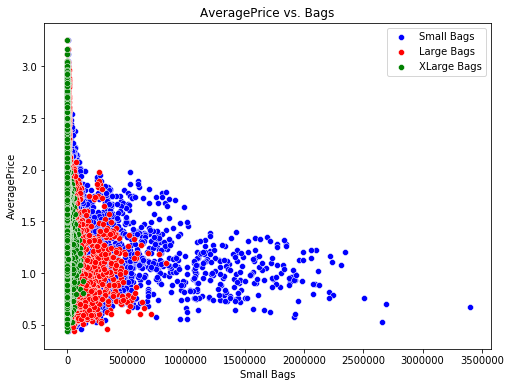

In [34]:
# AveragePrice vs. Bags (Small, Large, XLarge)

plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Small Bags', y='AveragePrice',color='blue', label='Small Bags')
sns.scatterplot(data=data, x='Large Bags', y='AveragePrice',color='red', label='Large Bags')
sns.scatterplot(data=data, x='XLarge Bags', y='AveragePrice',color='green', label='XLarge Bags')
plt.title('AveragePrice vs. Bags')
plt.legend()
plt.show()

XLarge Bags, although small in numbers, have relatively higher prices as compared to the other two.

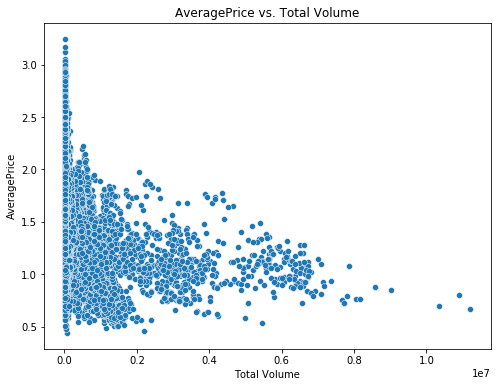

In [35]:
# AveragePrice vs. Total Volume

plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Total Volume', y='AveragePrice')
plt.title('AveragePrice vs. Total Volume')
plt.show()

The plot shows that most of the volume values in the data is lower than 0.4. For lower volumes average price tend to be a little higher as compared to that of higher volumes.

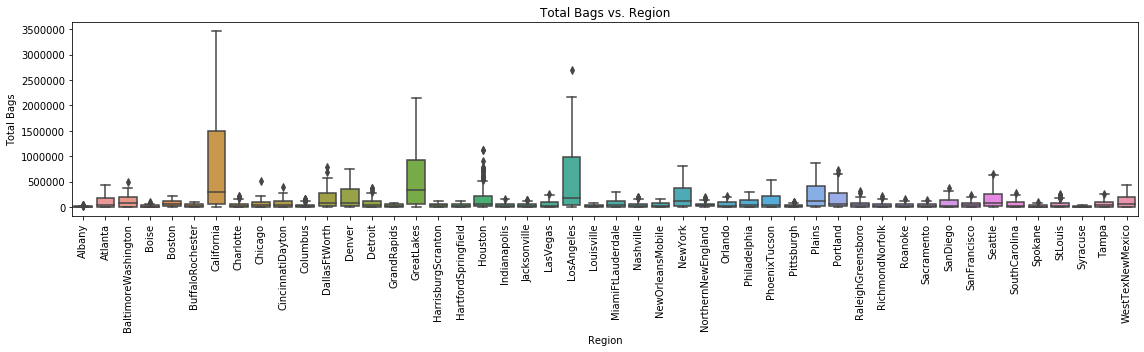

In [36]:
# Create a box plot of Total Bags vs. Region

plt.figure(figsize=(16,5))
sns.boxplot(data=data, x='region', y='Total Bags')
plt.title('Total Bags vs. Region')
plt.xlabel('Region')
plt.ylabel('Total Bags')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

The above plot shows that most number of bags were sold in California, GreatLakes,LosAngeles. Syracuse,and Albany selling the lowest number of bags.

In [37]:
# What cities had the highest/lowest number of bags sold
data.groupby(['region']).sum()['Total Bags'].astype(int).sort_values(ascending=False)

region
California             246682193
GreatLakes             178575648
LosAngeles             168264528
Plains                  77847204
NewYork                 67994156
Denver                  58957007
Seattle                 50691398
Houston                 50215064
Portland                49504359
DallasFtWorth           46469752
PhoenixTucson           38908236
BaltimoreWashington     35306146
WestTexNewMexico        35296515
Atlanta                 28560513
Detroit                 24260065
Philadelphia            23875232
MiamiFtLauderdale       23516442
SanDiego                23342668
Boston                  21495476
CincinnatiDayton        20897918
Tampa                   19496691
SouthCarolina           18153173
LasVegas                18052993
Chicago                 16865400
Orlando                 16861640
RaleighGreensboro       15676677
SanFrancisco            14890924
StLouis                 14736030
NewOrleansMobile        14268940
NorthernNewEngland      13905027
Har

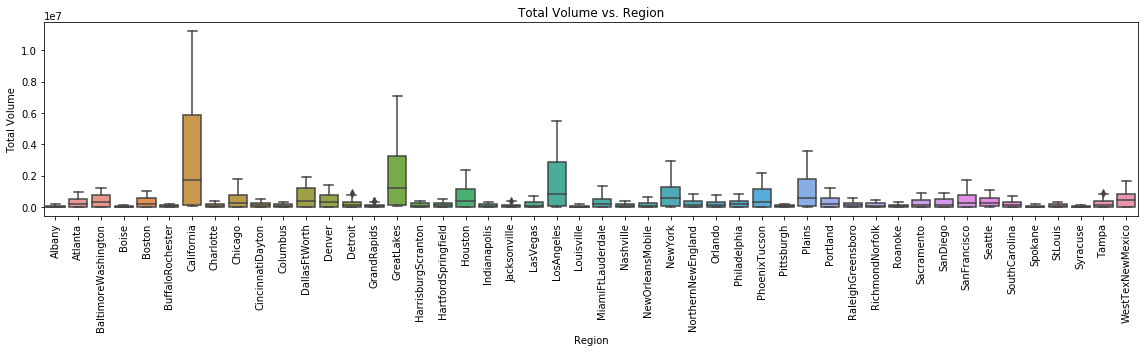

In [38]:
# Create a box plot of Total Volume vs. Region

plt.figure(figsize=(16,5))
sns.boxplot(data=data, x='region', y='Total Volume')
plt.title('Total Volume vs. Region')
plt.xlabel('Region')
plt.ylabel('Total Volume')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

The above plot shows the same as the last one that is the value for total volume is the highest in California, GreatLakes,LosAngeles and the lowest in Albany, Boise, Pittsburgh and Spokane.

In [39]:
# What cities had the highest/lowest volume
data.groupby(['region']).sum()['Total Volume'].astype(int).sort_values(ascending=False)

region
California             1028981653
GreatLakes              589642549
LosAngeles              507896547
Plains                  311188529
NewYork                 240734127
DallasFtWorth           208419286
Houston                 203167867
PhoenixTucson           195643312
WestTexNewMexico        144521839
Denver                  138902535
SanFrancisco            135830191
BaltimoreWashington     134713919
Chicago                 133702338
Portland                110552211
Seattle                 109214177
MiamiFtLauderdale        97673224
Boston                   97273984
SanDiego                 89791919
Atlanta                  88605118
Sacramento               75163746
Philadelphia             71838798
NorthernNewEngland       71532894
Tampa                    66004539
Detroit                  63422419
SouthCarolina            60753772
Orlando                  58660703
LasVegas                 54376906
HartfordSpringfield      50670537
RaleighGreensboro        48202731
NewOrle

In [40]:
# since total bags is the sum of all the individual columns(small bags, large bags, xlarge bags) we will drop that column
data.drop(['Total Bags'], axis=1, inplace =True)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany


In [41]:
# Extract the month from the 'Date' column
data['Month'] = data['Date'].dt.month
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,11


In [42]:
# Let's filter out month, and average price for each year, group by month, then find average

# Initialize an empty dictionary to store the results
yearly_avg_prices = {}

# Iterate over the unique years
for y in data['year'].unique():
    year_data = data[data['year'] == y]
    avg_prices = year_data.groupby('Month')['AveragePrice'].mean().round(2)
    yearly_avg_prices[y] = avg_prices

# Display the results
for year, avg_prices in yearly_avg_prices.items():
    print(f'Year {year}:\n{avg_prices}\n')

Year 2015:
Month
1     1.37
2     1.33
3     1.37
4     1.39
5     1.35
6     1.40
7     1.42
8     1.45
9     1.45
10    1.40
11    1.34
12    1.31
Name: AveragePrice, dtype: float64

Year 2016:
Month
1     1.24
2     1.24
3     1.23
4     1.21
5     1.21
6     1.29
7     1.41
8     1.42
9     1.44
10    1.57
11    1.56
12    1.33
Name: AveragePrice, dtype: float64

Year 2017:
Month
1     1.28
2     1.22
3     1.41
4     1.52
5     1.54
6     1.56
7     1.57
8     1.70
9     1.85
10    1.76
11    1.52
12    1.37
Name: AveragePrice, dtype: float64

Year 2018:
Month
1    1.39
2    1.32
3    1.34
Name: AveragePrice, dtype: float64



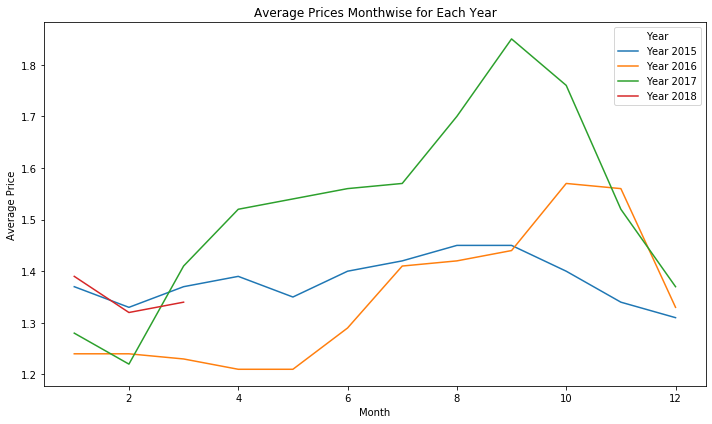

In [43]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot average prices monthwise for each year
for year, avg_prices in yearly_avg_prices.items():
    sns.lineplot(x=avg_prices.index, y=avg_prices.values, label=f'Year {year}')

plt.title('Average Prices Monthwise for Each Year')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend(title='Year')

plt.tight_layout()
plt.show()

1. For year 2018, we do not have enough data.
2. February of every year shows a dip in the prices.
3. Prices start to rise around july and starts to take a dip again after october.
4. September of 2017 has the highest average price for any month in the dataset.
5. May of 2016 has the lowest average price for any month.

In [44]:
# using label encoder to convert categorical column to numerical in dataset
from sklearn.preprocessing import LabelEncoder

# Select the categorical columns in your dataset
cat_columns = ['type','region']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in cat_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Display the updated dataset
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0,11


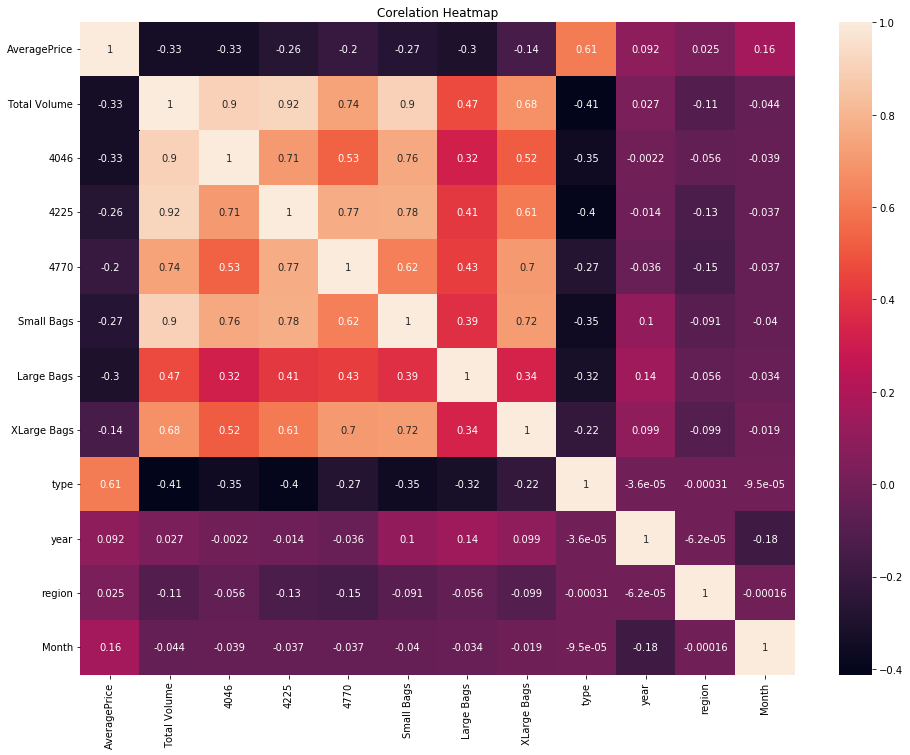

In [45]:
# lets check for correlation among columns

plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), annot=True)
plt.title("Corelation Heatmap")
plt.show()

In [46]:
# lets check the correlation of features with the target variable
data.corr()['region'].sort_values()

4770           -0.148908
4225           -0.134714
Total Volume   -0.107480
XLarge Bags    -0.099343
Small Bags     -0.091439
Large Bags     -0.056175
4046           -0.056044
type           -0.000314
Month          -0.000162
year           -0.000062
AveragePrice    0.024800
region          1.000000
Name: region, dtype: float64

1. 'AveragePrice' has a very weak positive correlation.
2. Other features have neagtive correlation.

In [47]:
data.corr()['AveragePrice'].sort_values()

4046           -0.333658
Total Volume   -0.329835
Large Bags     -0.304195
Small Bags     -0.272931
4225           -0.263494
4770           -0.204003
XLarge Bags    -0.142937
region          0.024800
year            0.091819
Month           0.160613
type            0.610103
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

1. 'region' has a very weak positive correlation.
2. 'type' has the strongest correlation and 'year', 'month' has slightly less positive correlation.
3. '4046', 'Total Volume', 'Large Bags', 'Small Bags', '4225', '4770', 'XLarge Bags' has negative correlation. 

### Regression

In [48]:
# For regression, average price is the target column

X= data.drop(['AveragePrice','Date'], axis=1)
y = data['AveragePrice']

In [49]:
#lets check for skewness and outliers in the dataset
X.skew().sort_values()

region          0.000038
type            0.000370
Month           0.106622
year            0.215360
4225            4.931785
Total Volume    5.107501
Large Bags      5.606700
4046            5.681518
Small Bags      6.116840
4770            6.674500
XLarge Bags     7.756943
dtype: float64

In [50]:
# remove skewness

# Identify the columns to transform
columns_to_transform = ['Total Volume', 'Large Bags', 'Small Bags', '4046', '4225', '4770', 'XLarge Bags']

# Apply log transformation to selected columns
for column in columns_to_transform:
    X[column] = np.log1p(X[column])

In [51]:
X.skew().sort_values()

Small Bags     -0.808720
4225           -0.606021
Large Bags     -0.562255
4046           -0.387803
Total Volume   -0.032537
region          0.000038
type            0.000370
Month           0.106622
4770            0.175609
year            0.215360
XLarge Bags     1.256583
dtype: float64

In [52]:
# finding and transforming outliers
# Iterate over each column in X
for col in X.columns:
    # Calculate the lower and upper thresholds for the column
    Q1 = np.percentile(X[col], 25)
    Q3 = np.percentile(X[col], 75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Replace outliers in the column with threshold values
    X[col] = np.where(X[col] < lower_threshold, lower_threshold, X[col])
    X[col] = np.where(X[col] > upper_threshold, upper_threshold, X[col])

The values in the dataset that are outside these thresholds are outliers. Since this dataset is small, we will transform these outliers using flooring or capping method. In this method, a threshold is set and values above or below that threshold is replaced with the nearest non-outlying value, in this case the threshold.

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# scaling the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# splitting data into train and tests set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (11354, 11)
X_test shape (4867, 11)
y_train shape (11354,)
y_test shape (4867,)


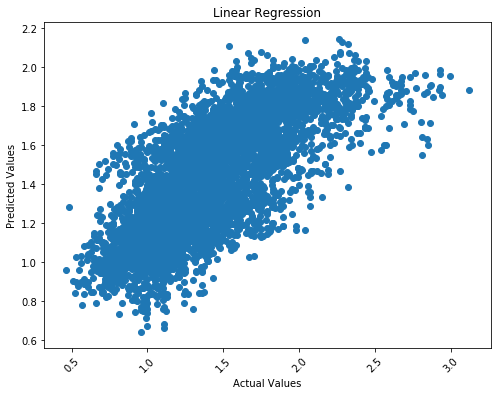

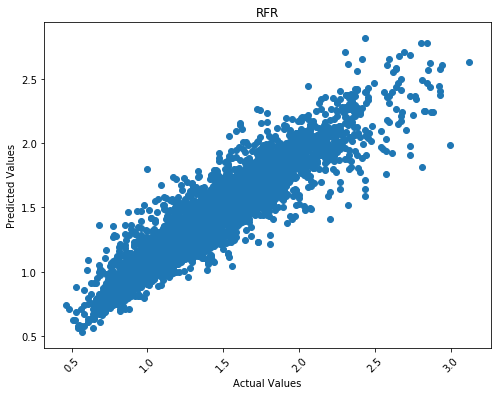

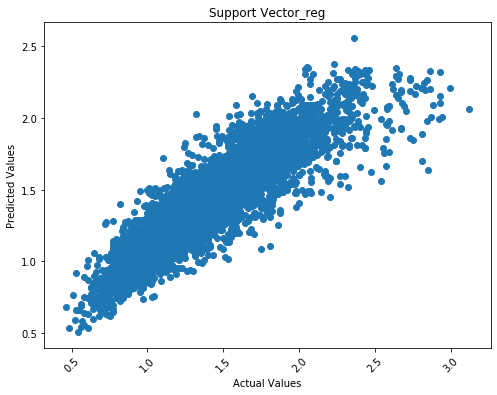

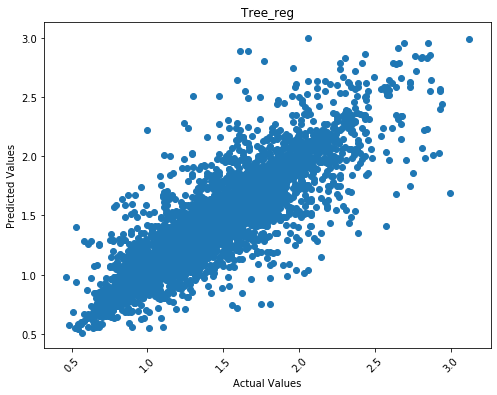

In [55]:
# importing libraries
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

models = [('Linear Regression', LinearRegression()),
          ('RFR', RandomForestRegressor()),('Support Vector_reg', SVR()),
          ('Tree_reg', DecisionTreeRegressor())]

predictions = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.append((name, y_pred))
    
# Plotting the predicted vs actual values
for name, y_pred in predictions:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(name)
    plt.xticks(rotation=45)
    plt.show()

In [56]:
metrics = []
for name, y_pred in predictions:
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    metrics.append((name, r2, mse, rmse, mae))

# Creating metrics dataframe
metrics_df = pd.DataFrame(metrics, columns=['Model_name', 'R2_score', 'Mean_Squared_Error',
                                            'Root_Mean_Squared_Error', 'Mean_Absolute_Error'])

metrics_df

,Model_name,R2_score,Mean_Squared_Error,Root_Mean_Squared_Error,Mean_Absolute_Error
0,Linear Regression,0.550862,0.076805,0.277137,0.215072
1,RFR,0.865202,0.023051,0.151826,0.105625
2,Support Vector_reg,0.799528,0.034282,0.185153,0.134761
3,Tree_reg,0.748404,0.043024,0.207423,0.133715


The Random Forest Regressor (RFR) model has the highest R2 score of 0.864413, indicating that it explains a significant portion of the variance in the target variable. It also has the lowest Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) values, which means it has better predictive accuracy and smaller errors compared to other models.
The Linear Regression model has the lowest R2 score, highest MSE and RMSE, suggesting it has the weakest predictive power among the evaluated models.

In [57]:
# using cross val score on the other thre regressors
for name, model in models:
    cv_score = cross_val_score(model, X, y, cv=5)
    print('Model :', name)
    print('cv_score :',cv_score)
    print('Mean Score', cv_score.mean())
    print("Diffrenece between Mean CV Score and R2 score", (r2_score(y_test,y_pred)-cv_score.mean()))
    print("\n")

Model : Linear Regression
cv_score : [-0.22537992  0.24444532  0.52256627  0.22555091  0.26146747]
Mean Score 0.20573000940477967
Diffrenece between Mean CV Score and R2 score 0.542674078664357


Model : RFR
cv_score : [-0.29645412  0.36719323  0.52917289  0.16771842 -0.03945875]
Mean Score 0.14563433305844867
Diffrenece between Mean CV Score and R2 score 0.6027697550106881


Model : Support Vector_reg
cv_score : [-0.53641343  0.49633172  0.14403141  0.30894099  0.05331739]
Mean Score 0.09324161664097289
Diffrenece between Mean CV Score and R2 score 0.6551624714281639


Model : Tree_reg
cv_score : [-1.06195777  0.0321516   0.2627327  -0.43072717 -0.37220323]
Mean Score -0.31400077336003857
Diffrenece between Mean CV Score and R2 score 1.0624048614291752




Overall, the Random Forest Regressor appears to be the most promising model based on its smaller difference between R2 score and Mean CV Score and high R2 scores, indicating better generalization to new data. 

In [58]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [63]:
# final model
final = RandomForestRegressor(max_depth= 20,max_features= 'sqrt',min_samples_leaf= 2,
                              min_samples_split= 2,n_estimators= 200)
final.fit(X_train,y_train)
final_pred = final.predict(X_test)
print("R2_score :", r2_score(y_test,final_pred))

R2_score : 0.8800013310460338


In [64]:
# saving the model
import joblib
joblib.dump(final, "Avocado_prices.pkl")

['Avocado_prices.pkl']

In [65]:
# predicting on the X with the saved model
#loading the aved model
model = joblib.load("Avocado_prices.pkl")

# prediction
prediction = model.predict(X)
prediction[:10]

array([1.29650411, 1.31358631, 1.03898224, 1.17639613, 1.26159015,
       1.28783677, 1.11101893, 1.06770206, 1.17582093, 1.14160456])

In [67]:
# comparing actual values and predicted values
pred = pd.DataFrame({'predicted':prediction, 'actual':y})
pred.head(10)

,predicted,actual
0,1.296504,1.33
1,1.313586,1.35
2,1.038982,0.93
3,1.176396,1.08
4,1.261590,1.28
5,1.287837,1.26
6,1.111019,0.99
7,1.067702,0.98
8,1.175821,1.02
9,1.141605,1.07


Conclusion:
1. Cleaned the dataset by converting the 'Date' column to datetime and removing unnecessary columns.
2. Filtered out subtotals to focus on city names for regions.
3. Explored summary statistics, missing values, unique values, and duplicated rows in the dataset.
4. Visualized the distribution of various features, including average prices, types of avocados, regions, and years.
5. Explored the distribution of avocado types (conventional vs. organic) and regions.
6. Investigated the relationship between average price and different features like type and region.
7. Analyzed how average prices vary over different years and months.
8. Explored the correlation between features and visualized it using heatmaps.
9. Transformed skewed features using log transformation to improve normality.
10. Managed outliers using flooring or capping method.
11. Scaled the dataset using StandardScaler and split it into training and testing sets.
12. Trained and evaluated four regression models: Linear Regression, Random Forest Regressor (RFR), Support Vector Regressor (SVR), and Decision Tree Regressor and evaluated the models using metrics such as R-squared, Mean Squared Error, Root Mean Squared Error, and Mean Absolute Error.

### Classification

In [102]:
# for classification, region is the target variable
X_c = data.drop(['Date','region'], axis=1)
y = data['region']

In [103]:
# checking and correcting skewness
X_c.skew().sort_values()

type            0.000370
Month           0.106622
year            0.215360
AveragePrice    0.589155
4225            4.931785
Total Volume    5.107501
Large Bags      5.606700
4046            5.681518
Small Bags      6.116840
4770            6.674500
XLarge Bags     7.756943
dtype: float64

In [104]:
columns_to_transform = ['4225','Total Volume','Large Bags','4046','Small Bags','4770' ,'XLarge Bags']

# Apply log transformation to selected columns
for column in columns_to_transform:
    X_c[column] = np.power(X_c[column],0.25)
    
# checking the skewness
X_c.skew().sort_values()

type            0.000370
Month           0.106622
year            0.215360
AveragePrice    0.589155
Large Bags      0.695867
4225            0.757973
Small Bags      0.798184
Total Volume    0.831366
4046            0.994201
4770            1.243547
XLarge Bags     1.926039
dtype: float64

Power values closer to 1 (e.g., 0.5, 0.3, 0.25) are commonly used for power transformations. Applying a power transformation with a power of 0.25 can be effective in reducing skewness while retaining some of the original data distribution characteristics. 

In [105]:
# finding and transforming outliers
# Iterate over each column in X
for col in X_c.columns:
    # Calculate the lower and upper thresholds for the column
    Q1 = np.percentile(X_c[col], 25)
    Q3 = np.percentile(X_c[col], 75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Replace outliers in the column with threshold values
    X_c[col] = np.where(X_c[col] < lower_threshold, lower_threshold, X_c[col])
    X_c[col] = np.where(X_c[col] > upper_threshold, upper_threshold, X_c[col])

The values in the dataset that are outside these thresholds are outliers. Since this dataset is small, we will transform these outliers using flooring or capping method. In this method, a threshold is set and values above or below that threshold is replaced with the nearest non-outlying value, in this case the threshold.

In [106]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# scaling the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X_c)

# splitting data into train and tests set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (11354, 11)
X_test shape (4867, 11)
y_train shape (11354,)
y_test shape (4867,)


In [113]:
from sklearn.metrics import (confusion_matrix, classification_report,accuracy_score,f1_score,precision_score,recall_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

models = [
    ('KNeighbors', KNeighborsClassifier()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier(n_estimators=100)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=100))]

scores_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

for name, model in models:
    print("Model: ", str(model))
    model.fit(X_train, y_train)
    print(confusion_matrix(y_test,y_pred))
    y_pred = model.predict(X_test)
    print()

    # Calculate the scores
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Add scores to the DataFrame
    scores_df = scores_df.append({'Model': name, 'Accuracy': accuracy, 'F1 Score': f1, 'Precision': precision, 'Recall': recall}, ignore_index=True)

print(scores_df)


Model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
[[ 0  0  0 ...  0  0  0]
 [ 0 42  0 ...  0  0  0]
 [ 0  3  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]]

Model:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
[[103   0   0 ...   4   0   0]
 [  0  69   0 ...   0   1   0]
 [  0   0 101 ...   0   0   0]
 ...
 [  6   0   0 ...  77   1   0]
 [  1   5   0 ...   0  27   1]
 [  0   1   0 ...   0   0  89]]

Model:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_f

In [115]:
# checking cv score for different classifiers
for name, model in models:
    cv_score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    accuracy = accuracy_score(y_test, y_pred)
    print('Model :', name)
    print('cv_score :',cv_score)
    print('Mean Score', cv_score.mean())
    print("Difference between accuracy and cv score is: ", accuracy-cv_score.mean())
    print("\n")

Model : KNeighbors
cv_score : [0.53171928 0.56451119 0.52620288 0.42226368 0.31467662]
Mean Score 0.47187472841126876
Difference between accuracy and cv score is:  -0.40920778779076333


Model : DecisionTree
cv_score : [0.5022985  0.65062826 0.59209317 0.52580846 0.39956468]
Mean Score 0.5340786109294167
Difference between accuracy and cv score is:  -0.47141167030891123


Model : RandomForest
cv_score : [0.6757585  0.8228624  0.76064971 0.67568408 0.48476368]
Mean Score 0.6839436742124498
Difference between accuracy and cv score is:  -0.6212767335919444


Model : AdaBoost
cv_score : [0.0447441  0.05638983 0.09806926 0.06094527 0.02767413]
Mean Score 0.05756451804721413
Difference between accuracy and cv score is:  0.0051024225732913125




1. Among the four models evaluated (KNeighbors, DecisionTree, RandomForest, and AdaBoost), RandomForest achieved the highest accuracy.
2. AdaBoost has significantly lower accuracy, F1 score, precision, and recall, suggesting that it is not performing well on the given data.
3. Cross-validation is used to assess how well the model generalizes to new, unseen data. It is evident from the cross-validation scores that RandomForest consistently performs better than the other models during cross-validation.
4. AdaBoost has a very low mean cross-validation score of approximately 0.058, implying that it is not generalizing well and is likely overfitting to the training data.
5. The difference between the accuracy and cross-validation scores can provide insights into potential overfitting or underfitting of the models. Models with smaller differences between accuracy and cross-validation scores are more likely to generalize well (lower overfitting). RandomForest has the smallest difference between accuracy and cross-validation scores (-0.621), indicating that it is performing consistently on both the training and validation data.
6. AdaBoost has a very low mean cross-validation score of approximately 0.058, implying that it is not generalizing well and is likely overfitting to the training data. 

Overall, RandomForest seems to be the most promising model for the given data, as it achieves the highest performance metrics and demonstrates good generalization during cross-validation. The other models might require further tuning or improvements to match RandomForest's performance. Additionally, AdaBoost's performance is significantly lower, and it may need adjustments or alternative approaches to improve its effectiveness on the data.

In [116]:
# Define the RandomForest model
rf_model = RandomForestClassifier()

# Define the hyperparameters to search through
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [120]:
# final model
final = RandomForestClassifier(max_depth=None ,min_samples_leaf=1 ,min_samples_split=2 ,n_estimators=200 )
final.fit(X_train,y_train)
final_pred = final.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, final_pred))

Accuracy :  0.9054859256215327


1. The final accuracy is 90.5%.

2. Since it is a multiclass classification, we will not plot the auc-roc curve.

In [121]:
# saving the model
import joblib
joblib.dump(final, "Avocado_region.pkl")

['Avocado_region.pkl']

In [123]:
# predicting on the X with the saved model
#loading the saved model
model = joblib.load("Avocado_region.pkl")

# prediction
prediction = model.predict(X)
prediction[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [125]:
# comparing actual values and predicted values
pred = pd.DataFrame({'predicted':prediction, 'actual':y})

In [126]:
pred.head(10)

,predicted,actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [127]:
pred.tail(15)

,predicted,actual
18210,46,46
18211,46,46
18212,46,46
18237,47,47
18238,47,47
18239,47,47
18240,47,47
18241,47,47
18242,47,47
18243,47,47


RandomForest performed the best among the models evaluated, and we successfully obtained insights on model performance and made predictions using the best model